#### Clustering

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


In [37]:
data=pd.read_csv("speeddating.csv")
data

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [38]:
#TODO Check which attributes have missing values 
nulls = data.isnull()*1
# Sum the columns
col_sums = nulls.sum()/len(data)*100

percetage_10=[]
for column in data.columns:
    if col_sums[column]>10:
        print(column, col_sums[column])
        percetage_10.append(column)
data=data.drop(columns=percetage_10)
print(percetage_10)

shared_interests_o 12.843160658868467
shared_interests_partner 12.735736452613988
expected_num_interested_in_me 78.5151587491048
expected_num_matches 14.000954881833373
['shared_interests_o', 'shared_interests_partner', 'expected_num_interested_in_me', 'expected_num_matches']


In [39]:
table_models = pd.DataFrame(columns=['Model', 'Train accuracy', 'Test accuracy', 'Observations'])

# Create model of logistic regression

variables2_X=["d_age","intelligence_o","funny_o"]
label_y=["match"]
variables2=variables2_X+label_y
data_model2=data[variables2]
data_model2= data_model2.dropna(how='any')
data_model2 = pd.get_dummies(data_model2, columns=label_y)
# Load your dataset into X and y
X =data_model2[variables2_X]
y =data_model2[data_model2.columns[-1]]
X

,d_age,intelligence_o,funny_o
0,6.0,8.0,8.0
1,1.0,10.0,7.0
2,1.0,10.0,10.0
3,2.0,9.0,8.0
4,3.0,9.0,6.0
...,...,...,...
8373,1.0,3.0,2.0
8374,1.0,7.0,3.0
8375,4.0,2.0,2.0
8376,3.0,5.0,5.0


In [40]:

# Set the number of clusters
n_clusters = 2

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to your data
kmeans.fit(X)

# Get the predicted cluster labels for each point in the data
labels = kmeans.predict(X)

# Add the predicted labels to your data table
X['KMeans Cluster'] = labels

# Print the cluster centers
print('Cluster centers:')
print(kmeans.cluster_centers_)

X["labels"]=y
X['matches']=(X["KMeans Cluster"]==X["labels"])*1
total_matches=X["matches"].sum()
print("Accuracy:",(total_matches/len(X))*100 )

Cluster centers:
[[ 3.49461528  7.35545608  6.39730115]
 [23.26530612  7.51020408  6.60816327]]
Accuracy: 80.93561368209255


C:\Users\afrincon\AppData\Local\Temp\ipykernel_18408\892796322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['KMeans Cluster'] = labels


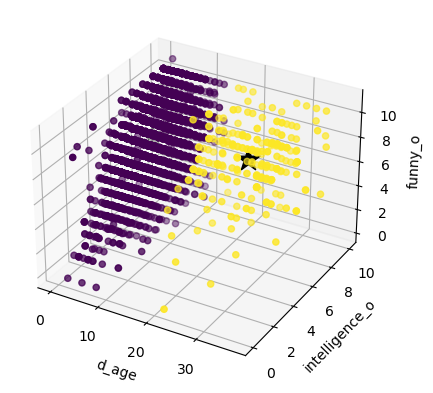

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points, colored by their KMeans cluster
ax.scatter(X['d_age'], X['intelligence_o'], X['funny_o'], c=labels, cmap='viridis')

# Plot the cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='*', s=300, c='black')

# Set the axis labels
ax.set_xlabel('d_age')
ax.set_ylabel('intelligence_o')
ax.set_zlabel('funny_o')

# Show the plot
plt.show()